In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

from tensorflow import keras
import os, sys, time 


print(sys.version_info)
for module in tf, mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
tensorflow 2.1.0
matplotlib 3.2.0
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [21]:
train_file = '../Titanic-data/train.csv'
eval_file = '../Titanic-data/eval.csv'
train_df = pd.read_csv(train_file)
eval_df = pd.read_csv(eval_file)
print(train_df,'\n',eval_df)

survived     sex   age  n_siblings_spouses  parch     fare   class  \
0           0    male  22.0                   1      0   7.2500   Third   
1           1  female  38.0                   1      0  71.2833   First   
2           1  female  26.0                   0      0   7.9250   Third   
3           1  female  35.0                   1      0  53.1000   First   
4           0    male  28.0                   0      0   8.4583   Third   
..        ...     ...   ...                 ...    ...      ...     ...   
622         0    male  28.0                   0      0  10.5000  Second   
623         0    male  25.0                   0      0   7.0500   Third   
624         1  female  19.0                   0      0  30.0000   First   
625         0  female  28.0                   1      2  23.4500   Third   
626         0    male  32.0                   0      0   7.7500   Third   

        deck  embark_town alone  
0    unknown  Southampton     n  
1          C    Cherbourg     n  
2 

In [3]:
y_train = train_df.pop('survived')
y_eval = eval_df.pop('survived')

print(y_train.head())
print(y_eval.head())

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64
0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64


In [4]:
train_df.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


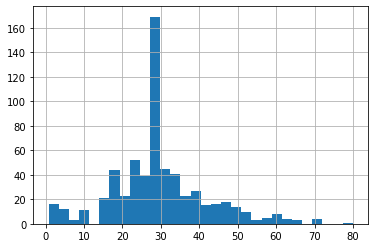

In [5]:
train_df.age.hist(bins=30)

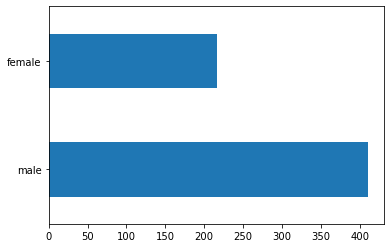

In [6]:
train_df.sex.value_counts().plot(kind='barh')

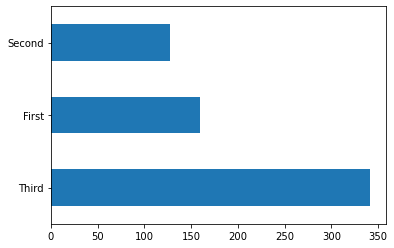

In [7]:
train_df['class'].value_counts().plot(kind='barh')

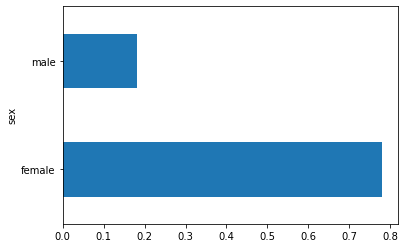

In [8]:
pd.concat([train_df, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh')

In [23]:
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
numeric_columns = ['age', 'fare']
feature_columns = []
for categorical_column in categorical_columns:
    # unique取出其中的所有的值
    vocab = train_df[categorical_column].unique()
    print(categorical_column, vocab)
    feature_columns.append(
        tf.feature_column.indicator_column(
            tf.feature_column.categorical_column_with_vocabulary_list(
                categorical_column, vocab
                )))
for categorical_column in numeric_columns:
    print(categorical_column)
    feature_columns.append(
        tf.feature_column.numeric_column(
            categorical_column, dtype=tf.float32
        ))
for _ in feature_columns:
    print(_,'===========================================================================================================================')

sex ['male' 'female']
n_siblings_spouses [1 0 3 4 2 5 8]
parch [0 1 2 5 3 4]
class ['Third' 'First' 'Second']
deck ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
embark_town ['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
alone ['n' 'y']
age
fare
IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)) ===========================================================================================================================
IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)) ===========================================================================================================================
IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_

In [65]:
def make_dataset(data_df, label_df, epochs=10, shuffle=True, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    print(dataset)
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size)
    return dataset
train_dataset = make_dataset(train_df, y_train, batch_size=5)

<TensorSliceDataset shapes: ({survived: (), sex: (), age: (), n_siblings_spouses: (), parch: (), fare: (), class: (), deck: (), embark_town: (), alone: ()}, ()), types: ({survived: tf.int32, sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int32, parch: tf.int32, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}, tf.int32)>


In [66]:
keras.backend.set_floatx('float32')
for x,y in train_dataset.take(1):
    # age_column = feature_columns[7]
    # gender_column = feature_columns[0]
    # print(keras.layers.DenseFeatures(age_column)(x).numpy())
    # print(keras.layers.DenseFeatures(gender_column)(x).numpy())
    print(keras.layers.DenseFeatures(feature_columns)(x).numpy())
    


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[ 28.5      0.       1.       1.       0.       0.       1.       0.
    0.       0.       0.       0.       0.       0.       0.       1.
    0.       0.       7.2292   0.       1.       0.       0.       0.
    0.       0.       1.       0.       0.       0.       0.       0.
    1.       0.    ]
 [ 22.       0.       1.       1.       0.       0.       1.       0.
    0.       0.       0.       0.       0.       0.       0.       1.
    0.       0.       7.2292   0.       1.       0.       0.       

In [12]:
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer= keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

In [67]:
# 1 model.filter
# 2 model -> estimator -> train
train_dataset = make_dataset(train_df, y_train, epochs=100)
eval_dataset = make_dataset(eval_df, y_eval, epochs=1, shuffle=False)
history = model.fit(train_dataset, validation_data=eval_dataset, steps_per_epoch=18, validation_steps=8, epochs=100)

<TensorSliceDataset shapes: ({survived: (), sex: (), age: (), n_siblings_spouses: (), parch: (), fare: (), class: (), deck: (), embark_town: (), alone: ()}, ()), types: ({survived: tf.int32, sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int32, parch: tf.int32, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}, tf.int32)>
<TensorSliceDataset shapes: ({survived: (), sex: (), age: (), n_siblings_spouses: (), parch: (), fare: (), class: (), deck: (), embark_town: (), alone: ()}, ()), types: ({survived: tf.int32, sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int32, parch: tf.int32, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}, tf.int32)>
Train for 18 steps, validate for 8 steps
Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 0.5406 - accuracy: 0.7552 - val_loss: 0.4983 - val_accuracy: 0.7461
Epoch 2/100
18/18 [==============================] - 0s 8ms/st

In [71]:
output_dir = '../tmp/'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
baseline_estimator = tf.estimator.BaselineClassifier(
    model_dir=output_dir,
    n_classes=2,)
    baseline_estimator.train(input_fn = lambda : make_dataset(train_df, y_trian, epochs=100))


IndentationError: unexpected indent (<ipython-input-71-042e353c60b3>, line 7)

In [69]:
# 使用keras中的estimator
estimator = keras.estimator.model_to_estimator(model)
# input_fn 是一个函数、返回元组:(features, labels)/dataset:(features, labels)
estimator.train(input_fn=lambda : make_dataset(train_df, y_train, epochs=100))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
Note that this doesn't affect the state of the model instance you passed as `keras_model` argument.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ASUS\\AppData\\Local\\Temp\\tmp22bcyjek', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is

ValueError: Unexpectedly found an instance of type `<class 'dict'>`. Expected a symbolic tensor instance.

In [72]:
baseline_estimator.evaluate()

NameError: name 'baseline_estimator' is not defined